<a href="https://colab.research.google.com/github/rroyc20/Ybigta-21-/blob/main/DL(MLP)_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 19기 DS 정은서님

In [1]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [2]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [7]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

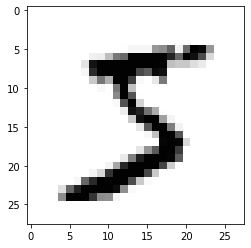

In [9]:
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [10]:
y_train.shape

(60000,)

In [11]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [12]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [14]:
from tensorflow.keras import layers

In [55]:
# Network Structure
network = tf.keras.models.Sequential() 
network.add(layers.Dense(128, activation = 'relu', input_shape=(28*28,))) # Hidden layer & Input layer (28x28개의 input을 받음)
network.add(layers.Dense(128, activation = 'relu')) # Hidden layer
network.add(layers.Dense(10, activation = 'softmax')) # Output layer - 10개의 노드로 구성 (one hot encoding 벡터 사이즈)
## 다항분류이므로 softmax 활성화함수 사용
## 이진분류인 경우 sigmoid 사용
network.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy', # 이진분류(binary classification)인 경우 loss='binary_crossentropy' 사용
               metrics=['accuracy'])

내가 만든 모델을 확인해 봅시다.

In [56]:
network.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 128)               100480    
                                                                 
 dense_44 (Dense)            (None, 128)               16512     
                                                                 
 dense_45 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [57]:
cls_history = network.fit(x_train, y_train, epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2303 - accuracy: 0.9316
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0975 - accuracy: 0.9702
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0683 - accuracy: 0.9787
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9839
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0416 - accuracy: 0.9867
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0323 - accuracy: 0.9899
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0284 - accuracy: 0.9905
Epoch 8/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0244 - accuracy: 0.9921
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0223 - accuracy: 0.9926
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [59]:
cls_history_dict.keys()

dict_keys(['loss', 'accuracy'])

In [60]:
cls_history_dict = cls_history.history
loss = cls_history_dict['loss']
epochs = range(1, len(loss) + 1)

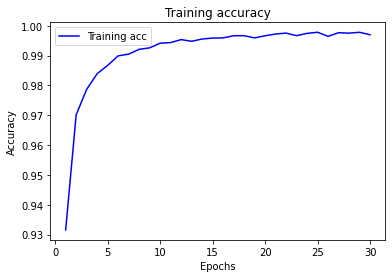

In [61]:
plt.clf() 
acc = cls_history_dict['accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

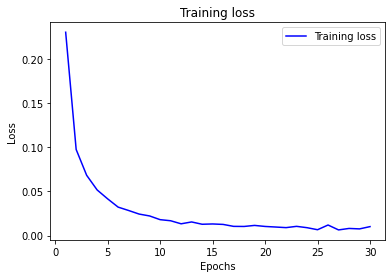

In [62]:
plt.clf() 

plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

95%이상의 성능을 가진 모델을 만들면 완성!

In [63]:
test_loss, test_acc = network.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.1507 - accuracy: 0.9793 - 680ms/epoch - 2ms/step

Accuracy: 0.9793000221252441


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)